In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

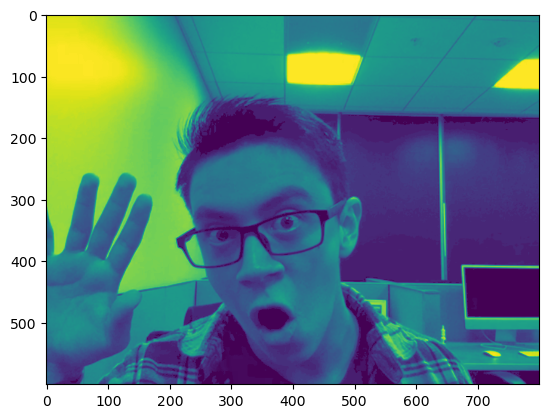

In [15]:
img = np.load('image.npy')
plt.imshow(img)

In [16]:
img.shape

(600, 800)

In [17]:
# img = cv2.imread('image.png')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [18]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(
        img,
        scaleFactor=1.3,
        minNeighbors=3,
        minSize=(30, 30)
) 

In [32]:
a = []
# Detect faces
faces = face_cascade.detectMultiScale(img, 1.1, 4)

# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cropped = img[y:y + h, x:x + w]
    a.append(cropped)

In [63]:
CATEGORIES = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

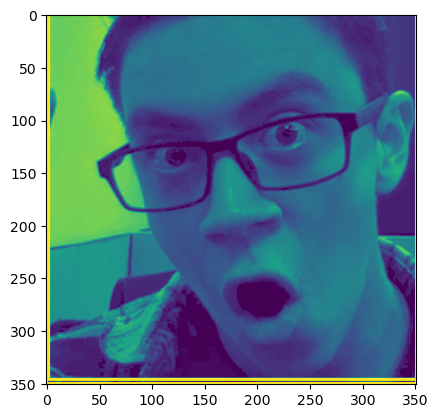

In [40]:
plt.imshow(a[0])

In [41]:
a

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ...,  34,  39, 255],
        ...,
        [255, 255,  28, ...,  13,  13, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)]

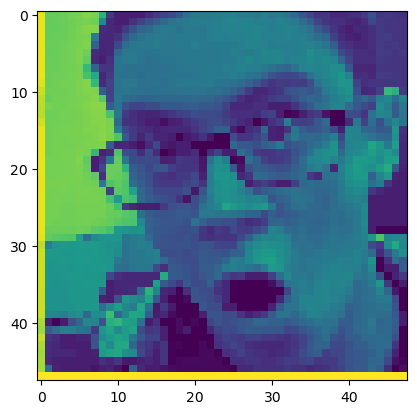

In [75]:
# Pre-processing image to feed into model
new_img = cv2.resize(a[0], (48, 48))
plt.imshow(new_img)
new_img = new_img.reshape(-1, 48, 48, 1)



In [80]:
model = load_model('../cnn_model/facial_emotion_recognition.h5')
pred = model.predict(new_img)
print(pred)

1/1 [==============================] - 0s 175ms/step
[[1.4581700e-02 3.7078485e-07 2.3950377e-01 1.7468807e-01 8.8302955e-02
  4.8059934e-01 2.3237562e-03]]


In [81]:
CATEGORIES[np.argmax(pred)]

'sad'